<a href="https://colab.research.google.com/github/nathancomley/ASSIGNMENT-2/blob/main/ASSESMENT_2_(TEST_PAD)_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [64]:
!wget -O enron.db https://curtin-my.sharepoint.com/:u:/g/personal/211934g_curtin_edu_au/EaYagsqa2r1Bi5wtHbswGFwBH2kd2uTnz6rlka7GI36GUQ?download=1

--2022-05-11 10:12:07--  https://curtin-my.sharepoint.com/:u:/g/personal/211934g_curtin_edu_au/EaYagsqa2r1Bi5wtHbswGFwBH2kd2uTnz6rlka7GI36GUQ?download=1
Resolving curtin-my.sharepoint.com (curtin-my.sharepoint.com)... 13.107.136.9, 13.107.138.9
Connecting to curtin-my.sharepoint.com (curtin-my.sharepoint.com)|13.107.136.9|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: /personal/211934g_curtin_edu_au/Documents/ISYS2001-Assignment-2-Data/enron_sqlite3.db?ga=1 [following]
--2022-05-11 10:12:08--  https://curtin-my.sharepoint.com/personal/211934g_curtin_edu_au/Documents/ISYS2001-Assignment-2-Data/enron_sqlite3.db?ga=1
Reusing existing connection to curtin-my.sharepoint.com:443.
HTTP request sent, awaiting response... 200 OK
Length: 853819392 (814M) [application/octet-stream]
Saving to: ‘enron.db’

enron.db            100%[===================>] 814.27M  37.0MB/s    in 26s     

2022-05-11 10:12:34 (31.3 MB/s) - ‘enron.db’ saved [853819392/853819392]



In [65]:
import sqlite3

In [66]:
conn = sqlite3.connect("enron.db")

In [67]:
cur = conn.cursor()

In [68]:
import pandas as pd

#Just testing some queries to see if It works

sql='''
SELECT * from Employeelist;
'''
# Load the data into a DataFrame
Employeelist_df = pd.read_sql_query(sql,conn)
Employeelist_df

,eid,firstName,lastName,Email_id,Email2,Email3,EMail4,folder,status
0,1,Robert,Badeer,robert.badeer@enron.com,rbadeer@enron.com,,,badeer-r,Director
1,2,Kevin,Hyatt,kevin.hyatt@enron.com,kevin_hyatt@enron.com,khyatt@enron.com,,hyatt-k,Director
2,3,Tracy,Geaccone,tracy.geaccone@enron.com,tracy_geaconne@enron.com,,,geaccone-t,Employee
3,4,Teb,Lokey,teb.lokey@enron.com,teb_lokey@enron.com,tlokey@enron.com,,lokey-t,Manager
4,5,Richard,Ring,richard.ring@enron.com,,,,ring-r,Employee
...,...,...,...,...,...,...,...,...,...
144,146,Steven,South,steven.p.south@enron.com,steven.south@enron.com,p..south@enron.com,,south-s,N/A
145,147,Carol,Clair,carol.clair@enron.com,carol.st.clair@enron.com,carol.stclair@enron.com,,stclair-c,Vice President
146,148,Chris,Stokley,chris.stokley@enron.com,,,,stokley-c,N/A
147,149,Kate,Symes,kate.symes@enron.com,ksymes@enron.com,,,symes-k,Employee


In [69]:
#Query for the number of messages that were sent to/from Enron employees by date

sql='''
SELECT date, count(mid) AS numMsg
 FROM message
 GROUP BY date
 ORDER BY date;
'''
# Load the data into a DataFrame
CountByDate_df = pd.read_sql_query(sql,conn)
CountByDate_df


,date,numMsg
0,0001-05-30 13:10:06,2
1,0001-06-18 09:40:11,1
2,0001-07-24 00:11:44,1
3,0001-08-01 15:30:11,1
4,0001-08-06 00:06:06,1
...,...,...
194082,2020-12-29 12:53:46,1
194083,2043-12-28 11:34:12,1
194084,2044-01-02 15:46:00,1
194085,2044-01-04 08:59:46,1


In [70]:
# query for number of emails for each employee.

sql= '''
SELECT sender, count(mid) AS message_count
 FROM message
 GROUP BY sender
 ORDER BY message_count;
 '''

# Load the data into a DataFrame
NumberOfEmailsPerEmployee_df = pd.read_sql_query(sql,conn)
NumberOfEmailsPerEmployee_df

,sender,message_count
0,0_19619_e719a090-7eca-d011-9d39-0000f84121eb_u...,1
1,0_19653_e719a090-7eca-d011-9d39-0000f84121eb_u...,1
2,0_19812_e719a090-7eca-d011-9d39-0000f84121eb_u...,1
3,1.11176403.-3@multexinvestornetwork.com,1
4,1.11176403.999@multexinvestornetwork.com,1
...,...,...
17522,tana.jones@enron.com,4437
17523,sara.shackleton@enron.com,4797
17524,kay.mann@enron.com,5100
17525,j.kaminski@enron.com,5838


In [71]:
#This code works to show the Top Ten email senders.

top10_df = NumberOfEmailsPerEmployee_df.tail(10)
top10_df

,sender,message_count
17517,debra.perlingiere@enron.com,2549
17518,matthew.lenhart@enron.com,2784
17519,enron.announcements@enron.com,2838
17520,no.address@enron.com,3511
17521,chris.germany@enron.com,3686
17522,tana.jones@enron.com,4437
17523,sara.shackleton@enron.com,4797
17524,kay.mann@enron.com,5100
17525,j.kaminski@enron.com,5838
17526,jeff.dasovich@enron.com,6273


In [72]:
#Testing to see if the dataframe has loaded and saved

print(top10_df)

                              sender  message_count
17517    debra.perlingiere@enron.com           2549
17518      matthew.lenhart@enron.com           2784
17519  enron.announcements@enron.com           2838
17520           no.address@enron.com           3511
17521        chris.germany@enron.com           3686
17522           tana.jones@enron.com           4437
17523      sara.shackleton@enron.com           4797
17524             kay.mann@enron.com           5100
17525           j.kaminski@enron.com           5838
17526        jeff.dasovich@enron.com           6273


In [73]:
#Now for Plotting

#what do I need to plot?
#-1. number of messages each day by date. The dataframe that will be plotted is : CountByDate_df 
#-2. who are the top ten emailers of the organisation. The dataframe that will be plotted is : top10_df  

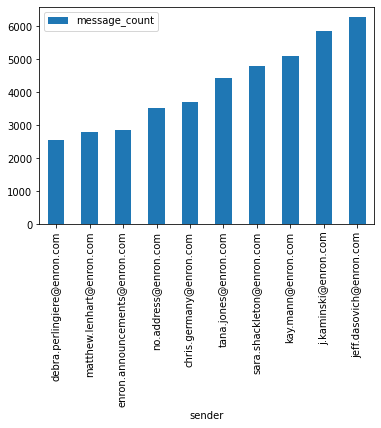

In [75]:
#Plotting top 10 senders with pandas

top10_df.plot(x ='sender', y='message_count', kind = 'bar')